<a href="https://colab.research.google.com/github/BiancaVoskelis/projeto_hipoteses/blob/main/Hipoteses2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importar pandas



In [ ]:
# prompt: importar pandas

import pandas as pd
import scipy.stats as stats


# Dataset


In [ ]:
#tabela projeto_hipoteses e apresentar em formato de tabela dataframe e chamar ela de df carregar arquivo csv
df = pd.read_csv('projeto_hipoteses.csv')
# Apresentar os dados em formato de tabela
display(df)


,track_id,track_name,artist_s__name,artist_count,release_date,streams,bpm,danceability__,valence__,energy__,...,categoria_speechiness,classificacao_bpm,classificacao_acousticness,classificacao_streams,classificacao_danceability,classificacao_liveness,classificacao_valence,classificacao_energy,classificacao_speechiness,classificacao_instrumentalness
0,1992045,notion,the rare occasions,1,2016-08-05,421135627,160,31,30,88,...,moderadamente falada,alto,baixo,alto,baixo,baixo,baixo,alto,alto,baixo
1,4758406,static,steve lacy,1,2022-07-15,202452860,79,34,22,31,...,moderadamente falada,baixo,alto,baixo,baixo,baixo,baixo,baixo,alto,alto
2,6380084,the hills,the weeknd,1,2015-05-27,1947371785,136,36,12,57,...,moderadamente falada,alto,baixo,alto,baixo,alto,baixo,baixo,alto,baixo
3,8779560,thousand miles,the kid laroi,1,2022-04-22,244741137,81,38,20,66,...,moderadamente falada,baixo,baixo,baixo,baixo,baixo,baixo,alto,alto,alto
4,8803071,how do i say goodbye,dean lewis,1,2022-08-05,284785823,82,40,39,64,...,moderadamente falada,baixo,alto,baixo,baixo,baixo,baixo,baixo,alto,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2150360,soy el unico,yahritza y su esencia,1,2022-03-25,126443991,84,71,63,45,...,predominantemente cantada,baixo,alto,baixo,alto,baixo,alto,baixo,baixo,alto
943,7543802,daydreaming,harry styles,1,2022-05-20,187703102,114,71,90,81,...,predominantemente cantada,baixo,alto,baixo,alto,alto,alto,alto,baixo,alto
944,8476304,wonderful christmastime edited version remas...,paul mccartney,1,1979-11-16,403939487,95,75,74,58,...,predominantemente cantada,baixo,alto,alto,alto,baixo,alto,baixo,baixo,alto
945,5831523,closer,the chainsmokers halsey,2,2016-05-31,2591224264,95,75,64,52,...,predominantemente cantada,baixo,alto,alto,alto,baixo,alto,baixo,baixo,baixo


# Mann-Whitney U Classificação Bpm



In [ ]:
from scipy.stats import mannwhitneyu
# Suponha que você tenha um DataFrame chamado df contendo suas colunas "bpm_class" (com "alto" e "baixo") e "streams"
# Divida o DataFrame em dois, um para cada classificação de "alto" e "baixo" em "bpm_class"
df_alto = df[df['classificacao_bpm'] == 'alto']
df_baixo = df[df['classificacao_bpm'] == 'baixo']
# Execute o teste de Mann-Whitney U
statistic, p_value = mannwhitneyu(df_alto['streams'], df_baixo['streams'])
# Imprima o resultado
print("Estatística do teste de Mann-Whitney U:", statistic)
print("Valor p:", p_value)
# Interpretando o resultado
alpha = 0.05  # nível de significância
if p_value < alpha:
    print("Rejeita-se a hipótese nula. Existem diferenças significativas nos streams entre as classificações de BPM 'baixo' e 'alto'.")
else:
    print("Não se rejeita a hipótese nula. Não existem diferenças significativas nos streams entre as classificações de BPM 'baixo' e 'alto'.")

Estatística do teste de Mann-Whitney U: 106524.5
Valor p: 0.24904767043838794
Não se rejeita a hipótese nula. Não existem diferenças significativas nos streams entre as classificações de BPM 'baixo' e 'alto'.


# Músicas com BPM (Batidas Por Minuto) mais altos fazem mais sucesso em termos de número de streams no Spotify.

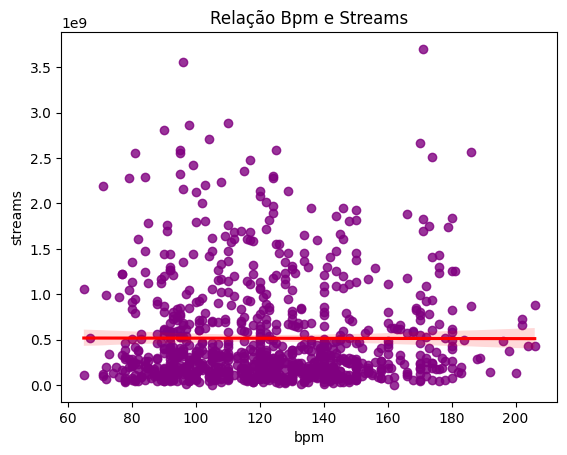

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a trend line
sns.regplot(x=df['bpm'], y=df['streams'], line_kws={"color":"red"},color='purple')

# Add title and labels
plt.title('Relação Bpm e Streams')
plt.xlabel('bpm')
plt.ylabel('streams')

# Show the plot
plt.show()


# Relação Streams e Bpm

Inclinação (a): -47646.57427768229
Intercepto (b): 520036694.7186872


<Figure size 500x500 with 0 Axes>

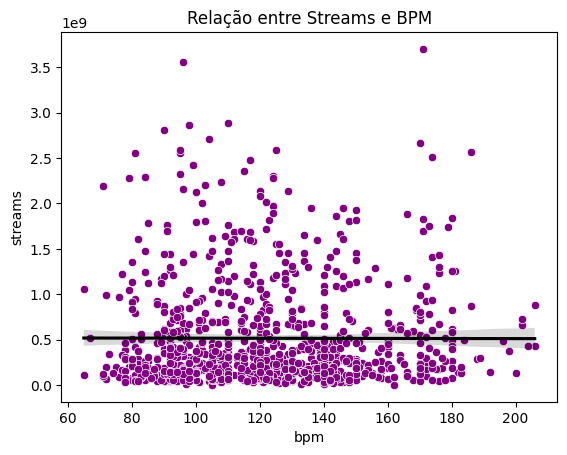

<Figure size 500x500 with 0 Axes>

In [ ]:
# regressão linear onde streams é = y e a variável dependente e x = a bpm a
# variável independente A= é a inclinação da reta, que representa como Y
# muda em função de X. B= é o intercepto no eixo Y quando X é igual a zero.
import statsmodels.api as sm
# Criar um modelo de regressão linear
model = sm.OLS(df['streams'], sm.add_constant(df['bpm'])).fit()
# Obter os coeficientes do modelo
a = model.params[1]
b = model.params[0]
# Imprimir os coeficientes
print("Inclinação (a):", a)
print("Intercepto (b):", b)
# Plotar o gráfico de dispersão com a reta de regressão
sns.scatterplot(x=df['bpm'], y=df['streams'], color='purple')
sns.regplot(x=df['bpm'], y=df['streams'], scatter=False, color='black')
# Adicionar título e rótulos
plt.title('Relação entre Streams e BPM')
plt.xlabel('bpm')
plt.ylabel('streams')
# Definir o tamanho da figura
plt.figure(figsize=(5, 5))

# Relação Streams e Bpm


In [ ]:
!pip install seaborn
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Coeficiente de correlação de Pearson: -0.0023532018917884453
Valor p: 0.9423469327148797
Não existe uma correlação linear significativa entre bpm e streams.


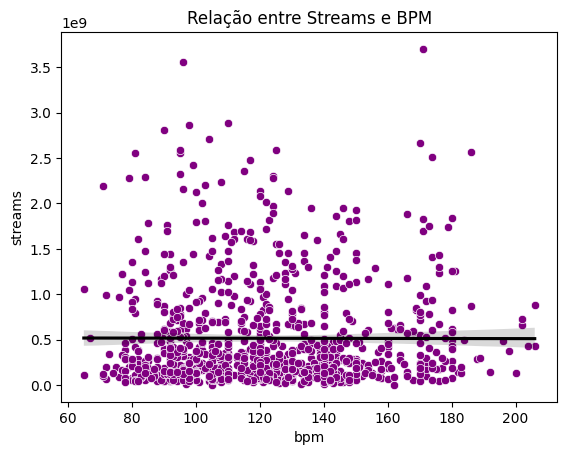

<Figure size 500x500 with 0 Axes>

In [ ]:
# prompt: relação linear entre duas variáveis ​​contínuas bpm e streams
# Calcular a correlação de Pearson entre bpm e streams
corr, p_value = stats.pearsonr(df['bpm'], df['streams'])
# Imprimir o coeficiente de correlação e o valor p
print("Coeficiente de correlação de Pearson:", corr)
print("Valor p:", p_value)
# Interpretar o resultado
if p_value < 0.05:
    print("Existe uma correlação linear significativa entre bpm e streams.")
else:
    print("Não existe uma correlação linear significativa entre bpm e streams.")
# Plotar o gráfico de dispersão com a reta de regressão
sns.scatterplot(x=df['bpm'], y=df['streams'], color='purple')
sns.regplot(x=df['bpm'], y=df['streams'], scatter=False, color='black')
# Adicionar título e rótulos
plt.title('Relação entre Streams e BPM')
plt.xlabel('bpm')
plt.ylabel('streams')
# Definir o tamanho da figura
plt.figure(figsize=(5, 5))
# Mostrar o gráfico
plt.show()

# Relação Streams e Danceability


Inclinação (a): -4092541.666049201
Intercepto (b): 788250157.5415456


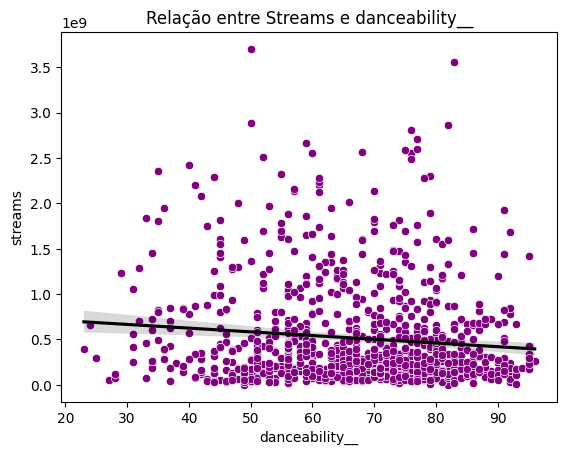

<Figure size 500x500 with 0 Axes>

In [ ]:
# prompt: preciso fazer uma regressão linear onde streams é = y e a variável dependente e x = a bpm a variável independente A=  é a inclinação da reta, que representa como Y muda em função de X.
# B= é o intercepto no eixo Y quando X é igual a zero.
import statsmodels.api as sm
# Criar um modelo de regressão linear
model = sm.OLS(df['streams'], sm.add_constant(df['danceability__'])).fit()
# Obter os coeficientes do modelo
a = model.params[1]
b = model.params[0]
# Imprimir os coeficientes
print("Inclinação (a):", a)
print("Intercepto (b):", b)
# Plotar o gráfico de dispersão com a reta de regressão
sns.scatterplot(x=df['danceability__'], y=df['streams'], color='purple')
sns.regplot(x=df['danceability__'], y=df['streams'], scatter=False, color='black')
# Adicionar título e rótulos
plt.title('Relação entre Streams e danceability__')
plt.xlabel('danceability__')
plt.ylabel('streams')
# Definir o tamanho da figura
plt.figure(figsize=(5, 5))
# Mostrar o gráfico
plt.show()

# Relação Streams e Total playlists






Inclinação (a): 49778.45978910781
Intercepto (b): 232530258.62528434


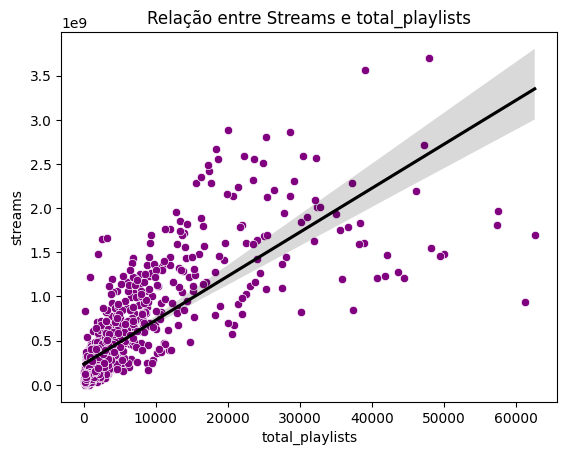

<Figure size 500x500 with 0 Axes>

In [ ]:
# prompt: preciso fazer uma regressão linear onde streams é = y e a variável dependente e x = a bpm a variável independente A=  é a inclinação da reta, que representa como Y muda em função de X.
# B= é o intercepto no eixo Y quando X é igual a zero.
import statsmodels.api as sm
# Criar um modelo de regressão linear
model = sm.OLS(df['streams'], sm.add_constant(df['total_playlists'])).fit()
# Obter os coeficientes do modelo
a = model.params[1]
b = model.params[0]
# Imprimir os coeficientes
print("Inclinação (a):", a)
print("Intercepto (b):", b)
# Plotar o gráfico de dispersão com a reta de regressão
sns.scatterplot(x=df['total_playlists'], y=df['streams'], color='purple')
sns.regplot(x=df['total_playlists'], y=df['streams'], scatter=False, color='black')
# Adicionar título e rótulos
plt.title('Relação entre Streams e total_playlists')
plt.xlabel('total_playlists')
plt.ylabel('streams')
# Definir o tamanho da figura
plt.figure(figsize=(5, 5))
# Mostrar o gráfico
plt.show()

# Relação entre Streams e BPM


Coeficiente de correlação de Pearson: -0.0023532018917884453
Valor p: 0.9423469327148797
Não existe uma correlação linear significativa entre bpm e streams.


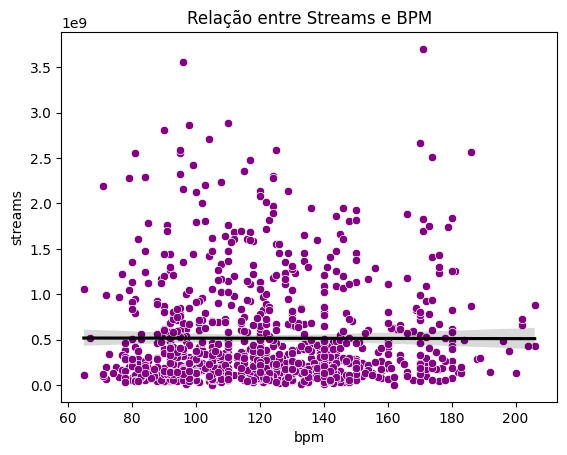

<Figure size 500x500 with 0 Axes>

In [ ]:
# prompt: relação linear entre duas variáveis ​​contínuas bpm e streams
# Calcular a correlação de Pearson entre bpm e streams
corr, p_value = stats.pearsonr(df['bpm'], df['streams'])
# Imprimir o coeficiente de correlação e o valor p
print("Coeficiente de correlação de Pearson:", corr)
print("Valor p:", p_value)
# Interpretar o resultado
if p_value < 0.05:
    print("Existe uma correlação linear significativa entre bpm e streams.")
else:
    print("Não existe uma correlação linear significativa entre bpm e streams.")
# Plotar o gráfico de dispersão com a reta de regressão
sns.scatterplot(x=df['bpm'], y=df['streams'], color='purple')
sns.regplot(x=df['bpm'], y=df['streams'], scatter=False, color='black')
# Adicionar título e rótulos
plt.title('Relação entre Streams e BPM')
plt.xlabel('bpm')
plt.ylabel('streams')
# Definir o tamanho da figura
plt.figure(figsize=(5, 5))
# Mostrar o gráfico
plt.show()

# Mann-Whitney U Classificação danceability alto e baixo

In [ ]:
from scipy.stats import mannwhitneyu
# Suponha que você tenha um DataFrame chamado df contendo suas colunas "bpm_class" (com "alto" e "baixo") e "streams"
# Divida o DataFrame em dois, um para cada classificação de "alto" e "baixo" em "bpm_class"
df_alto = df[df['classificacao_danceability'] == 'alto']
df_baixo = df[df['classificacao_danceability'] == 'baixo']
# Execute o teste de Mann-Whitney U
statistic, p_value = mannwhitneyu(df_alto['streams'], df_baixo['streams'])
# Imprima o resultado
print("Estatística do teste de Mann-Whitney U:", statistic)
print("Valor p:", p_value)
# Interpretando o resultado
alpha = 0.05  # nível de significância
if p_value < alpha:
    print("Rejeita-se a hipótese nula. Existem diferenças significativas nos streams entre as classificações de BPM 'baixo' e 'alto'.")
else:
    print("Não se rejeita a hipótese nula. Não existem diferenças significativas nos streams entre as classificações de BPM 'baixo' e 'alto'.")



Estatística do teste de Mann-Whitney U: 104628.5
Valor p: 0.07662622192641944
Não se rejeita a hipótese nula. Não existem diferenças significativas nos streams entre as classificações de BPM 'baixo' e 'alto'.


#A presença de uma música em um maior número de playlists está correlacionada com um maior número de streams.

Inclinação (a): 49778.45978910781
Intercepto (b): 232530258.62528434


<Figure size 500x500 with 0 Axes>

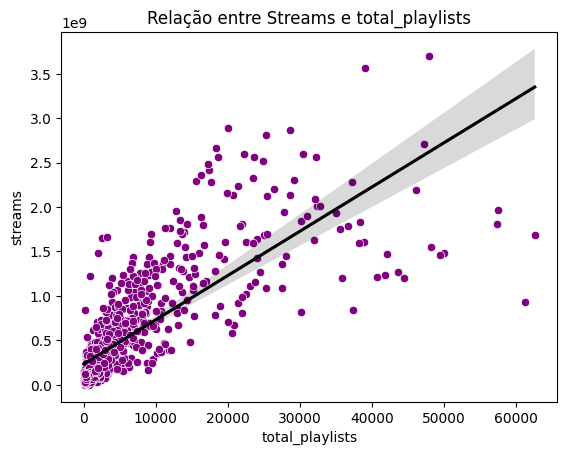

<Figure size 500x500 with 0 Axes>

In [ ]:
# regressão linear onde streams é = y e a variável dependente e x = a bpm a
# variável independente A= é a inclinação da reta, que representa como Y
# muda em função de X. B= é o intercepto no eixo Y quando X é igual a zero.
import statsmodels.api as sm
# Criar um modelo de regressão linear
model = sm.OLS(df['streams'], sm.add_constant(df['total_playlists'])).fit()
# Obter os coeficientes do modelo
a = model.params[1]
b = model.params[0]
# Imprimir os coeficientes
print("Inclinação (a):", a)
print("Intercepto (b):", b)
# Plotar o gráfico de dispersão com a reta de regressão
sns.scatterplot(x=df['total_playlists'], y=df['streams'], color='purple')
sns.regplot(x=df['total_playlists'], y=df['streams'], scatter=False, color='black')
# Adicionar título e rótulos
plt.title('Relação entre Streams e total_playlists')
plt.xlabel('total_playlists')
plt.ylabel('streams')
# Definir o tamanho da figura
plt.figure(figsize=(5, 5))

# Relação entre Streams e total_playlists


Coeficiente de correlação de Pearson: 0.7832123734157367
Valor p arredondado: 0.0
Existe uma correlação linear significativa entre total_playlists e streams.


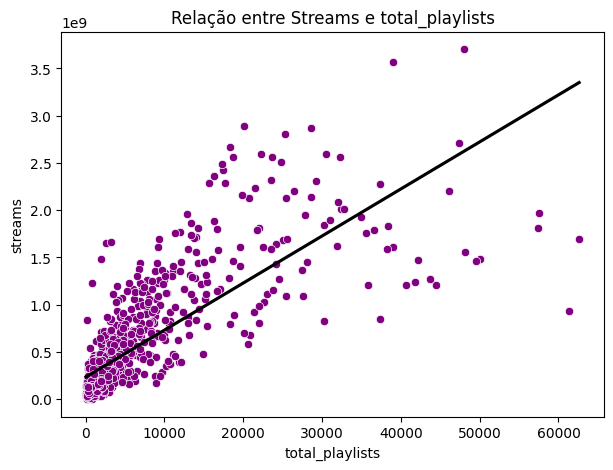

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Calcular a correlação de Pearson entre total_playlists e streams
corr, p_value = stats.pearsonr(df['total_playlists'], df['streams'])
# Arredondar o valor P
p_value_rounded = round(p_value, 4)
# Imprimir o coeficiente de correlação e o valor p
print("Coeficiente de correlação de Pearson:", corr)
print("Valor p arredondado:", p_value_rounded)
# Interpretar o resultado
if p_value < 0.05:
    print("Existe uma correlação linear significativa entre total_playlists e streams.")
else:
    print("Não existe uma correlação linear significativa entre total_playlists e streams.")
# Plotar o gráfico de dispersão com a reta de regressão
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['total_playlists'], y=df['streams'], color='purple')
sns.regplot(x=df['total_playlists'], y=df['streams'], scatter=False, color='black', ci=None)
# Adicionar título e rótulos
plt.title('Relação entre Streams e total_playlists')
plt.xlabel('total_playlists')
plt.ylabel('streams')
# Remover a sombra da linha
plt.grid(False)
# Mostrar o gráfico
plt.show()











# Média, Mediana e Moda Bpm

In [ ]:
# Medidas de tendência central entre bpm e streams
# Média
mean_bpm = df['bpm'].mean()
mean_streams = df['streams'].mean()
# Mediana
median_bpm = df['bpm'].median()
median_streams = df['streams'].median()
# Moda
mode_bpm = df['bpm'].mode().values[0]
mode_streams = df['streams'].mode().values[0]
# Imprimir as medidas de tendência central
print("Média de bpm:", mean_bpm)
print("Média de streams:", mean_streams)
print("\nMediana de bpm:", median_bpm)
print("Mediana de streams:", median_streams)
print("\nModa de bpm:", mode_bpm)
print("Moda de streams:", mode_streams)

Média de bpm: 122.47624076029567
Média de streams: 514201121.4160507

Mediana de bpm: 121.0
Mediana de streams: 287278853.0

Moda de bpm: 120
Moda de streams: 156338624


#As características da música influenciam o sucesso em termos de número de streams no Spotify.


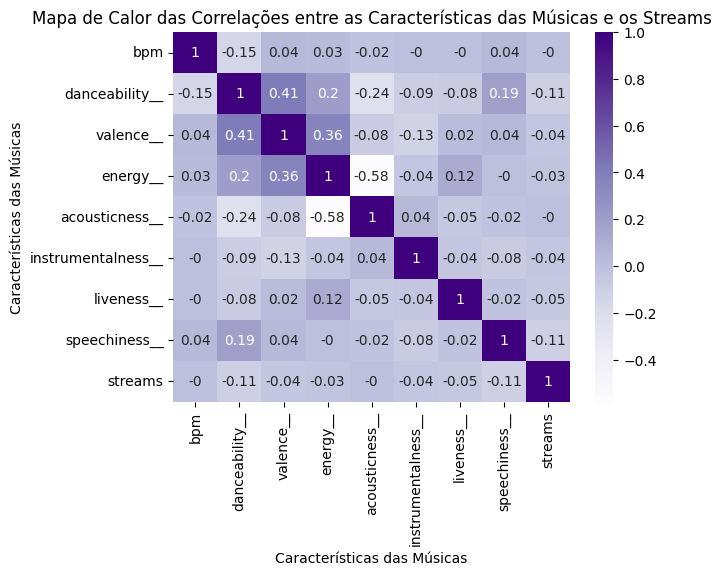

In [ ]:
#fazer a correlação das características das músicas bpm
# danceability__
# valence__
# energy__
# acousticness__
# instrumentalness__
# liveness__
# speechiness__ com a variável streams o gráfico precisa ser um mapa de calor arredondando os resultados as cores entre purple claro e escuro
import seaborn as sns
import matplotlib.pyplot as plt
# Criar um DataFrame com as variáveis
df_corr = df[['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'streams']]
# Calcular a matriz de correlação
corr = df_corr.corr()
# Arredondar os valores da matriz de correlação
corr = corr.round(2)
# Criar um mapa de calor
sns.heatmap(corr, annot=True, cmap='Purples')
# Definir o título e os rótulos dos eixos
plt.title('Mapa de Calor das Correlações entre as Características das Músicas e os Streams')
plt.xlabel('Características das Músicas')
plt.ylabel('Características das Músicas')
# Mostrar o mapa de calor
plt.show()

# Mapa de Calor das Correlações entre total_playlists e streams

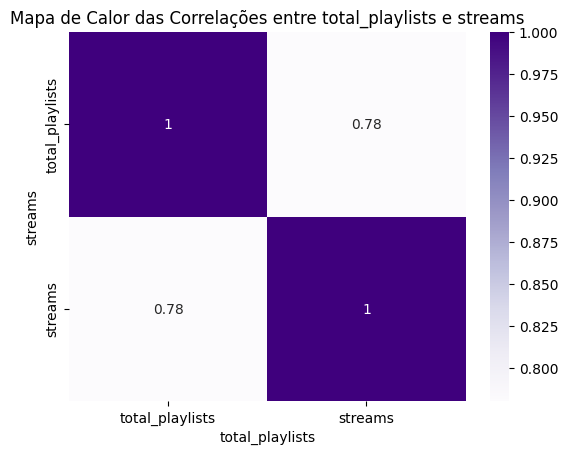

In [ ]:
#mapa de calor entre total de playlists e streams
# Criar um DataFrame com as variáveis
df_corr = df[['total_playlists', 'streams']]
# Calcular a matriz de correlação
corr = df_corr.corr()
# Arredondar os valores da matriz de correlação
corr = corr.round(2)
# Criar um mapa de calor
sns.heatmap(corr, annot=True, cmap='Purples')
# Definir o título e os rótulos dos eixos
plt.title('Mapa de Calor das Correlações entre total_playlists e streams')
plt.xlabel('total_playlists')
plt.ylabel('streams')
# Mostrar o mapa de calor
plt.show()

# As músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas, como a Deezer

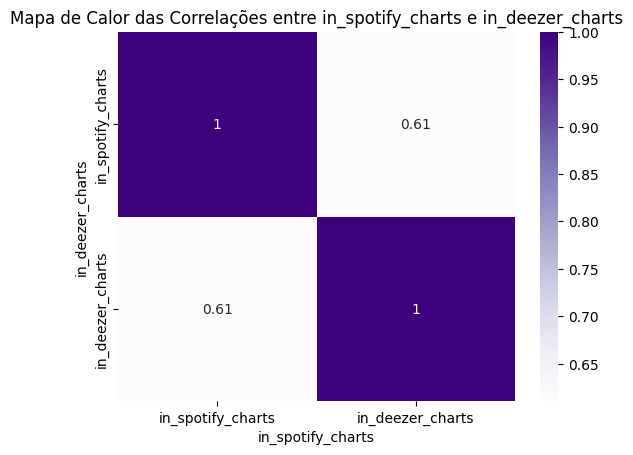

In [ ]:
# prompt: mapa de calor entre in_spotify_charts e in_deezer_charts
# Criar um DataFrame com as variáveis
df_corr = df[['in_spotify_charts', 'in_deezer_charts']]
# Calcular a matriz de correlação
corr = df_corr.corr()
# Arredondar os valores da matriz de correlação
corr = corr.round(2)
# Criar um mapa de calor
sns.heatmap(corr, annot=True, cmap='Purples')
# Definir o título e os rótulos dos eixos
plt.title('Mapa de Calor das Correlações entre in_spotify_charts e in_deezer_charts')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_deezer_charts')
# Mostrar o mapa de calor
plt.show()

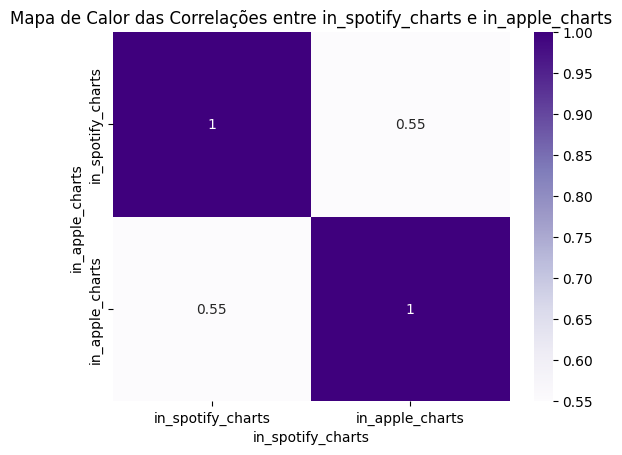

In [ ]:
# prompt: mapa de calor entre in_spotify_charts e in_apple_charts
# Criar um DataFrame com as variáveis
df_corr = df[['in_spotify_charts', 'in_apple_charts']]
# Calcular a matriz de correlação
corr = df_corr.corr()
# Arredondar os valores da matriz de correlação
corr = corr.round(2)
# Criar um mapa de calor
sns.heatmap(corr, annot=True, cmap='Purples')
# Definir o título e os rótulos dos eixos
plt.title('Mapa de Calor das Correlações entre in_spotify_charts e in_apple_charts')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_apple_charts')
# Mostrar o mapa de calor
plt.show()

#Artistas com um maior número de músicas no Spotify têm mais streams.

Correlação de Pearson entre o número de músicas e o número de streams: 0.7783706140980655
Valor p: 0.0


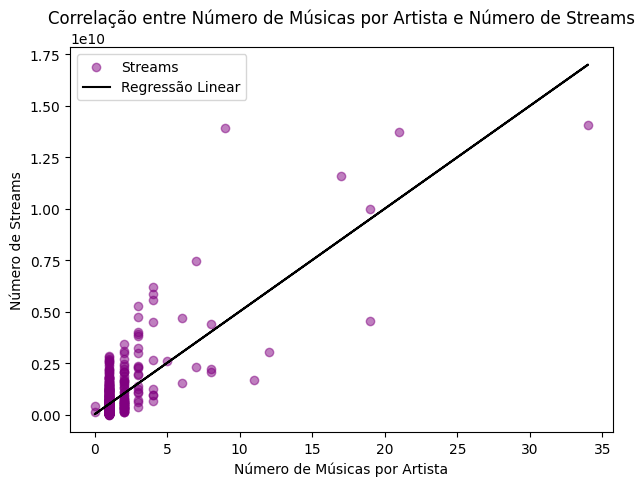

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# Carregar os dados para o DataFrame
# Substitua 'projeto_hipoteses.csv' pelo nome do seu arquivo
df = pd.read_csv('projeto_hipoteses.csv')
# Contar músicas por artista
musicas_por_artista = df.groupby('artist_s__name')['track_name'].count().reset_index()
musicas_por_artista.columns = ['artist_s__name', 'num_musicas']
# Calcular a soma dos streams por artista
streams_por_artista = df.groupby('artist_s__name')['streams'].sum().reset_index()
# Juntar os resultados em um único DataFrame
dados_completos = pd.merge(musicas_por_artista, streams_por_artista, on='artist_s__name')
# Calcular a correlação de Pearson entre o número de músicas e o número de streams
correlacao, p_value = stats.pearsonr(dados_completos['num_musicas'], dados_completos['streams'])
# Imprimir a correlação de Pearson e o valor p arredondado
print('Correlação de Pearson entre o número de músicas e o número de streams:', correlacao)
print('Valor p:', round(p_value, 2))
# Criar o gráfico de dispersão
plt.figure(figsize=(7, 5))
plt.scatter(dados_completos['num_musicas'], dados_completos['streams'], color='purple', alpha=0.5, label='Streams')
plt.title('Correlação entre Número de Músicas por Artista e Número de Streams')
plt.xlabel('Número de Músicas por Artista')
plt.ylabel('Número de Streams')
# Remover as linhas de grade
plt.grid(False)
# Adicionar linha de tendência
z = np.polyfit(dados_completos['num_musicas'], dados_completos['streams'], 1)
p = np.poly1d(z)
plt.plot(dados_completos['num_musicas'], p(dados_completos['num_musicas']), color='black', label='Regressão Linear')
# Adicionar legenda
plt.legend()
# Mostrar o gráfico
plt.show()








#Gráfico de Dispersão com Linha de Tendência entre in_spotify_charts e in_deezer_charts


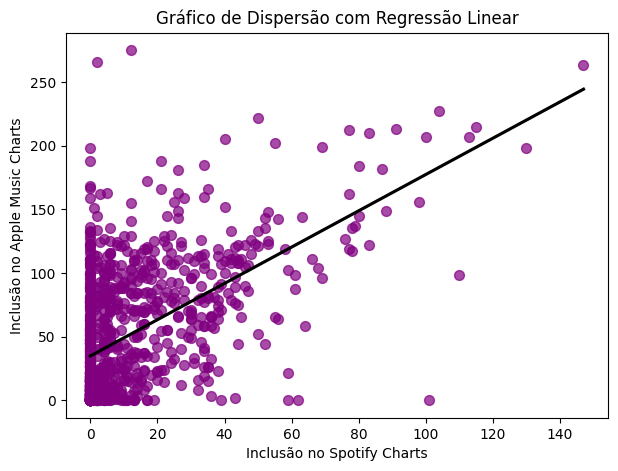

Correlação de Spearman: 0.52
Valor-p: 0.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Spearman correlation between 'in_spotify_charts' and 'in_apple_charts'
corr, p_value = stats.spearmanr(df['in_spotify_charts'], df['in_apple_charts'])
# Plotar o gráfico de dispersão com a linha de regressão linear
plt.figure(figsize=(7,5))
sns.regplot(x='in_spotify_charts', y='in_apple_charts', data=df, color='purple', scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={"color": "black"}, ci=None)
# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Dispersão com Regressão Linear')
plt.xlabel('Inclusão no Spotify Charts')
plt.ylabel('Inclusão no Apple Music Charts')
# Remover as linhas de grade
plt.grid(False)
# Exibir o gráfico
plt.show()
# Imprimir a correlação e o valor-p
print("Correlação de Spearman:", corr_rounded)
print("Valor-p:", p_value_rounded)











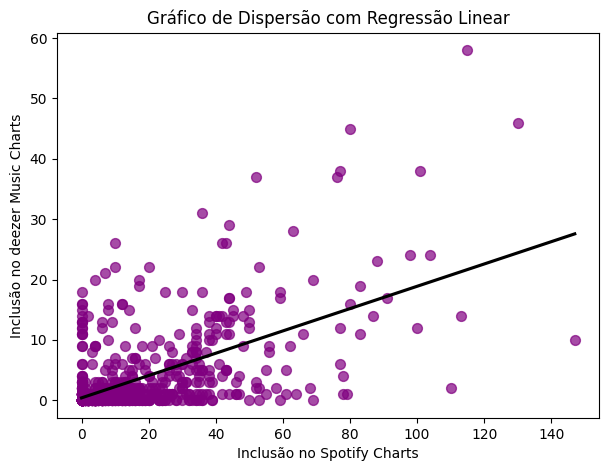

Correlação de Spearman: 0.59
Valor-p: 0.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Spearman correlation between 'in_spotify_charts' and 'in_apple_charts'
corr, p_value = stats.spearmanr(df['in_spotify_charts'], df['in_deezer_charts'])
# Plotar o gráfico de dispersão com a linha de regressão linear
plt.figure(figsize=(7, 5))
sns.regplot(x='in_spotify_charts', y='in_deezer_charts', data=df, color='purple', scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={"color": "black"}, ci=None)
# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Dispersão com Regressão Linear')
plt.xlabel('Inclusão no Spotify Charts')
plt.ylabel('Inclusão no deezer Music Charts')
# Remover as linhas de grade
plt.grid(False)
# Exibir o gráfico
plt.show()
# Imprimir a correlação e o valor-p
print("Correlação de Spearman:", corr_rounded)
print("Valor-p:", p_value_rounded)









